# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [3586]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [3587]:
# Read the XLSX file
data = pd.read_csv("data/dataset_bronze.csv")

In [3588]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",05/04/2023,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"Pierre Tessier,Chris Pratt,Jérémie Covillault",The Super Mario Bros. Movie,U.S.A.,Anglais,Long-métrage,2023.0,NaN,7 178 203 entrées,"3,1","4,1",1022 Critiques Spectateurs,NaN,Alors qu’ils tentent de réparer une canalisati...,1 866 914
1,Les Vengeances de Maître Poutifard,28/06/2023,"Comédie,Famille",90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,France,Français,Long-métrage,2023.0,NaN,421 927 entrées,"2,0","2,0",5 articles de presse,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180 735
2,Des mains en or,07/06/2023,Comédie,90.0,Isabelle Mergault,Zinc Film,"Lambert Wilson,Josiane Balasko,Sylvie Testud",NaN,France,Français,Long-métrage,2023.0,NaN,269 253 entrées,"2,2","3,4",6 articles de presse,NaN,"François, futur académicien, est un écrivain c...",109 081
3,The Covenant,23/06/2023,"Action,Guerre,Thriller",123.0,Guy Ritchie,-,"Jake Gyllenhaal,Dar Salim,Alexander Ludwig",NaN,Grande-Bretagne,Anglais,Long-métrage,2023.0,NaN,NaN,"3,1","4,1",7 articles de presse,NaN,"Lors de sa dernière mission en Afghanistan, le...",6 380 188
4,"Cléo, Melvil et moi",05/07/2023,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"Arnaud Viard,Marianne Denicourt,Romane Bohringer",NaN,France,Français,Long-métrage,2023.0,NaN,2 306 entrées,"3,3","3,2",12 articles de presse,NaN,"Dans le Paris désert du premier confinement, A...",1 849


In [3589]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             10416 non-null  object 
 1   date              9819 non-null   object 
 2   genre             10416 non-null  object 
 3   durée             10211 non-null  float64
 4   réalisateur       10409 non-null  object 
 5   distributeur      10416 non-null  object 
 6   acteurs           10215 non-null  object 
 7   titre_original    4097 non-null   object 
 8   nationalités      10416 non-null  object 
 9   langue_d_origine  10416 non-null  object 
 10  type_film         10416 non-null  object 
 11  annee_production  10413 non-null  float64
 12  budget            3058 non-null   object 
 13  box_office_total  8480 non-null   object 
 14  note_presse       10154 non-null  object 
 15  note_spectateurs  8492 non-null   object 
 16  nombre_article    9888 non-null   object

In [3590]:
data.shape

(10416, 20)

In [3591]:
print(data['box_office_total'].unique())

['7 178 203 entrées' '421 927 entrées' '269 253 entrées' ... '219 entrées'
 '114 entrées' '1 289 entrées']


## <font color="green"> || - Missing Data </font>

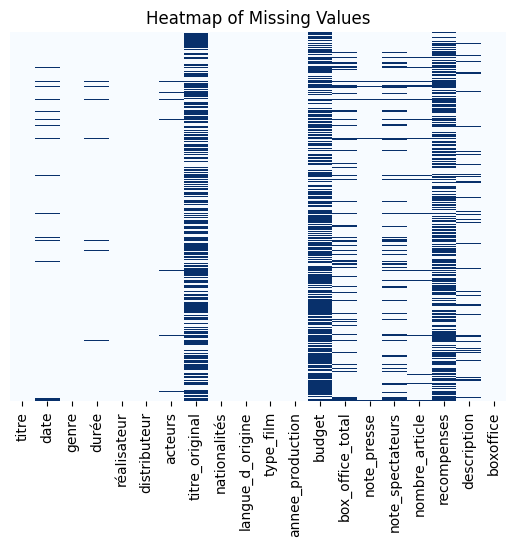

In [3592]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [3593]:
data.isnull().sum()

titre                  0
date                 597
genre                  0
durée                205
réalisateur            7
distributeur           0
acteurs              201
titre_original      6319
nationalités           0
langue_d_origine       0
type_film              0
annee_production       3
budget              7358
box_office_total    1936
note_presse          262
note_spectateurs    1924
nombre_article       528
recompenses         6335
description         1032
boxoffice              0
dtype: int64

In [3594]:
colonnes_a_supprimer = ['titre_original', 'budget']
data = data.drop(colonnes_a_supprimer, axis=1)


In [3595]:
# Afficher les lignes contenant des NaN dans le DataFrame
lignes_nan = data[data['acteurs'].isnull()]
lignes_nan.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
20,Les Grandes vacances de cowboy et indien,07/06/2023,"Animation,Famille",52.0,Vincent Patar,Cinéma Public Films,NaN,Belgique,Français,Long-métrage,2021.0,16 704 entrées,"3,8","3,3",NaN,NaN,"Cowboy et Indien, accompagnés de personnages l...",3 507
146,Limbo,NaN,"Epouvante-horreur,Thriller",NaN,Chris Peckover,-,NaN,U.S.A.,Anglais,Long-métrage,2019.0,NaN,"3,0",NaN,NaN,NaN,Une jeune mère se retrouve possédée par une en...,3 912
220,Apaches,NaN,Divers,NaN,Sean O'Keefe,-,NaN,U.S.A.,Anglais,Long-métrage,2012.0,NaN,NaN,NaN,NaN,NaN,Un groupe de policiers à la retraite décide de...,33 659
235,Titanic,NaN,Drame,NaN,Pier Angelo Mazzolotti,-,NaN,Italie,-,Long-métrage,1915.0,NaN,"2,9",NaN,NaN,NaN,"Lors de son voyage inaugural, le Titanic heurt...",498 212
311,Five,26/05/2004,Drame,74.0,Abbas Kiarostami,MK2 Diffusion,NaN,Iran,Farsi,Long-métrage,2003.0,NaN,"3,5","3,1",6 Critiques Spectateurs,NaN,1- La caméra accompagne un morceau de bois ave...,237 226


In [3596]:
# Supprimer les lignes contenant des NaN dans la colonne 'acteurs'
data = data.dropna(subset=['acteurs'])

In [3597]:
# Supprimer les lignes contenant des NaN dans la colonne 'acteurs'
data = data.dropna(subset=['réalisateur'])

In [3598]:
data = data.dropna(subset=['langue_d_origine'])

In [3599]:
data.shape

(10212, 18)

In [3600]:
# Afficher les lignes contenant des NaN dans le DataFrame
lignes_nan = data[data['durée'].isnull()]
lignes_nan.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
165,Joker,NaN,"Comédie,Science fiction",NaN,Shirish Kunder,-,"Akshay Kumar,Sonakshi Sinha,Anjaan Srivastav",Inde,Hindi,Long-métrage,2012.0,NaN,"2,8",NaN,1 Critique Spectateur,NaN,"En 1947, lors de la scission de l'Inde et du P...",1 576 425
183,En eaux troubles,NaN,Policier,NaN,Robby Henson,-,"Billy Bob Thornton,Patricia Arquette,Sela Ward",U.S.A.,Anglais,Long-métrage,2002.0,NaN,"3,0",NaN,9 Critiques Spectateurs,NaN,"Dans une petite ville de l'Amérique profonde, ...",710 798
184,En eaux troubles,NaN,Policier,NaN,Robby Henson,-,"Billy Bob Thornton,Patricia Arquette,Sela Ward",U.S.A.,Anglais,Long-métrage,2002.0,NaN,"3,0",NaN,9 Critiques Spectateurs,NaN,"Dans une petite ville de l'Amérique profonde, ...",3 066
262,Carmen,NaN,Drame,NaN,Jacques Malaterre,-,"Kevyn Diana,Vicky Luengo,Bernard Blancan",France,Français,Télefilm,2010.0,NaN,"2,5",NaN,NaN,NaN,Une libre adaptation du classique de Prosper M...,24 397
323,Sherlock Holmes,NaN,Policier,NaN,Arthur Berthelet,-,"William Gillette,Marjorie Kay,Ernest Maupain",U.S.A.,Muet,Long-métrage,1916.0,NaN,"3,1",NaN,NaN,NaN,"Adaptation de la pièce de ""Sherlock Holmes"" co...",780 449


In [3601]:
# Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
moyenne_colonne = data['durée'].mean()
data['durée'] = data['durée'].fillna(moyenne_colonne)

In [3602]:
data.isnull().sum()

titre                  0
date                 522
genre                  0
durée                  0
réalisateur            0
distributeur           0
acteurs                0
nationalités           0
langue_d_origine       0
type_film              0
annee_production       0
box_office_total    1855
note_presse          206
note_spectateurs    1813
nombre_article       415
recompenses         6138
description         1013
boxoffice              0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [3603]:
data.duplicated().sum()

11

In [3604]:
data = data.drop_duplicates()

## <font color="green"> IV - Nettoyage Données Quantitatives </font>

In [3605]:
def convert_data_types(df):
    # Convertir la colonne 'date' en type datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Convertir la colonne 'durée' en type float
    df['durée'] = pd.to_numeric(df['durée'], errors='coerce')

    # Convertir la colonne 'annee_production' en type int
    df['annee_production'] = df['annee_production'].astype(int)

    # Convertir les colonnes 'note_presse' et 'note_spectateurs' en type float
    df['note_presse'] = pd.to_numeric(df['note_presse'].str.replace(',', '.'), errors='coerce')
    df['note_spectateurs'] = pd.to_numeric(df['note_spectateurs'].str.replace(',', '.'), errors='coerce')

    # Convertir la colonne 'nombre_article' en type int en gardant seulement le nombre
    df['nombre_article'] = df['nombre_article'].str.extract('(\d+)').astype(float)

    # Enlever le texte dans la colonne 'box_office_total' et convertir en type int
    df['box_office_total'] = df['box_office_total'].str.replace(' ', '').str.replace('entrées', '')

    # Convert the 'box_office_total' column to type int using pd.to_numeric with errors='coerce'
    df['box_office_total'] = pd.to_numeric(df['box_office_total'], errors='coerce').astype('Int64')
    
    # Convertir la colonne 'boxoffice' en type int
    df['boxoffice'] = df['boxoffice'].str.replace(' ', '').astype(int)

    return df

In [3606]:
data_propre = convert_data_types(data)

In [3607]:
data_propre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10201 entries, 0 to 10415
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   titre             10201 non-null  object        
 1   date              3950 non-null   datetime64[ns]
 2   genre             10201 non-null  object        
 3   durée             10201 non-null  float64       
 4   réalisateur       10201 non-null  object        
 5   distributeur      10201 non-null  object        
 6   acteurs           10201 non-null  object        
 7   nationalités      10201 non-null  object        
 8   langue_d_origine  10201 non-null  object        
 9   type_film         10201 non-null  object        
 10  annee_production  10201 non-null  int64         
 11  box_office_total  8347 non-null   Int64         
 12  note_presse       9995 non-null   float64       
 13  note_spectateurs  8389 non-null   float64       
 14  nombre_article    9786 non-

In [3608]:
# Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
moyenne_colonne = data_propre['note_presse'].mean()
data_propre['note_presse'] = data_propre['note_presse'].fillna(moyenne_colonne)

In [3609]:
# Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
moyenne_colonne = data_propre['note_spectateurs'].mean()
data_propre['note_spectateurs'] = data_propre['note_spectateurs'].fillna(moyenne_colonne)

In [3610]:
data_propre.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",2023-05-04,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"Pierre Tessier,Chris Pratt,Jérémie Covillault",U.S.A.,Anglais,Long-métrage,2023,7178203,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914
1,Les Vengeances de Maître Poutifard,NaT,"Comédie,Famille",90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",France,Français,Long-métrage,2023,421927,2.0,2.0,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735
2,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"Lambert Wilson,Josiane Balasko,Sylvie Testud",France,Français,Long-métrage,2023,269253,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081
3,The Covenant,NaT,"Action,Guerre,Thriller",123.0,Guy Ritchie,-,"Jake Gyllenhaal,Dar Salim,Alexander Ludwig",Grande-Bretagne,Anglais,Long-métrage,2023,<NA>,3.1,4.1,7.0,NaN,"Lors de sa dernière mission en Afghanistan, le...",6380188
4,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"Arnaud Viard,Marianne Denicourt,Romane Bohringer",France,Français,Long-métrage,2023,2306,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849


In [3611]:
data_propre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10201 entries, 0 to 10415
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   titre             10201 non-null  object        
 1   date              3950 non-null   datetime64[ns]
 2   genre             10201 non-null  object        
 3   durée             10201 non-null  float64       
 4   réalisateur       10201 non-null  object        
 5   distributeur      10201 non-null  object        
 6   acteurs           10201 non-null  object        
 7   nationalités      10201 non-null  object        
 8   langue_d_origine  10201 non-null  object        
 9   type_film         10201 non-null  object        
 10  annee_production  10201 non-null  int64         
 11  box_office_total  8347 non-null   Int64         
 12  note_presse       10201 non-null  float64       
 13  note_spectateurs  10201 non-null  float64       
 14  nombre_article    9786 non-

In [3612]:
data_propre.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",2023-05-04,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"Pierre Tessier,Chris Pratt,Jérémie Covillault",U.S.A.,Anglais,Long-métrage,2023,7178203,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914
1,Les Vengeances de Maître Poutifard,NaT,"Comédie,Famille",90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",France,Français,Long-métrage,2023,421927,2.0,2.0,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735
2,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"Lambert Wilson,Josiane Balasko,Sylvie Testud",France,Français,Long-métrage,2023,269253,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081
3,The Covenant,NaT,"Action,Guerre,Thriller",123.0,Guy Ritchie,-,"Jake Gyllenhaal,Dar Salim,Alexander Ludwig",Grande-Bretagne,Anglais,Long-métrage,2023,<NA>,3.1,4.1,7.0,NaN,"Lors de sa dernière mission en Afghanistan, le...",6380188
4,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"Arnaud Viard,Marianne Denicourt,Romane Bohringer",France,Français,Long-métrage,2023,2306,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849


In [3613]:
print(data_propre['type_film'].unique())

['Long-métrage' 'Télefilm' 'Film à sketches' 'Sérials']


In [3614]:
print(data_propre['box_office_total'].unique())

<IntegerArray>
[7178203,  421927,  269253,    <NA>,    2306,    1745,    1273,   43349,
  239211, 3337102,
 ...
     148,    1071,     740,     343,    1350,    2507,     602,     219,
     114,    1289]
Length: 7676, dtype: Int64


## <font color="green"> V - Nettoyage Données Qualitatives </font>

In [3615]:
print(data_propre['genre'])

0         Animation,Comédie,Famille
1                   Comédie,Famille
2                           Comédie
3            Action,Guerre,Thriller
4                Comédie dramatique
                    ...            
10411                         Drame
10412                         Drame
10413                       Comédie
10414                       Comédie
10415    Comédie dramatique,Romance
Name: genre, Length: 10201, dtype: object


In [3616]:
print(data_propre['genre'].unique())

['Animation,Comédie,Famille' 'Comédie,Famille' 'Comédie'
 'Action,Guerre,Thriller' 'Comédie dramatique' 'Drame,Historique,Romance'
 'Drame' 'Biopic,Drame' 'Aventure,Historique' 'Biopic,Drame,Musical'
 'Action' 'Action,Comédie' 'Thriller'
 'Epouvante-horreur,Science fiction,Thriller'
 'Biopic,Epouvante-horreur,Fantastique' 'Comédie,Policier'
 'Policier,Thriller' 'Epouvante-horreur' 'Animation,Famille,Fantastique'
 'Comédie musicale,Drame' 'Drame,Romance' 'Aventure,Fantastique'
 'Action,Espionnage,Thriller' 'Action,Science fiction,Thriller'
 'Action,Thriller' 'Drame,Romance,Thriller'
 'Action,Arts Martiaux,Comédie,Drame,Science fiction'
 'Comédie,Comédie dramatique,Drame' 'Aventure,Famille,Fantastique'
 'Science fiction,Thriller' 'Aventure,Comédie' 'Action,Policier'
 'Aventure,Science fiction' 'Comédie,Drame,Romance,Science fiction'
 'Action,Drame,Science fiction' 'Drame,Thriller' 'Drame,Policier,Thriller'
 'Action,Aventure,Science fiction' 'Action,Aventure,Fantastique'
 'Epouvante-horre

In [3617]:
# # Définir la fonction de regroupement des genres
# def regrouper_genres(genre):
#     # Définir un dictionnaire de correspondance pour regrouper les genres
#     genre_mapping = {
#         'Action': 'Action/Aventure',
#         'Aventure': 'Action/Aventure',
#         'Science fiction': 'Action/Aventure',
#         'Fantastique': 'Action/Aventure',
#         'Comédie musicale': 'Comédie',
#         'Espionnage': 'Thriller',
#         'Arts Martiaux': 'Action/Aventure',
#         'Judiciaire': 'Policier',
#         'Erotique': 'Adulte',
#         'Bollywood': 'Drame/Romance',
#         'Expérimental': 'Autre',
#         'Péplum': 'Historique',
#         'Drama': 'Drame/Romance',
#         'Drame': 'Drame/Romance',
#         'Romance': 'Drame/Romance',
#         'Epouvante-horreur': 'Thriller',
#         'Péplum':'Historique'
#         # Ajouter d'autres regroupements si nécessaire
#     }
    
#     # Séparer les genres de la liste et les mapper selon le dictionnaire de correspondance
#     if isinstance(genre, str):
#         genres = genre.split(',')
#         genres = [genre_mapping.get(genre.strip(), genre.strip()) for genre in genres]
#         return ','.join(genres)
#     return genre

In [3618]:
def nettoyage_qualita(df):
    # Clean 'titre' column by removing leading/trailing whitespaces
    df['titre'] = df['titre'].str.strip()
    # Clean 'genre' column by filling missing values with an appropriate placeholder (e.g., 'Unknown')
    # Clean 'genre' column by replacing missing values with NaN
    #------------------------------------------
    # Clean 'date' column by converting it to datetime and keeping only valid dates
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    # #------------------------------------------
    # # Remove rows where 'type_film' column contains 'Téléfilm' or 'Film à sketches'
    df = df[~df['type_film'].isin(['Téléfilm', 'Film à sketches'])]
    # #------------------------------------------
    # df['genre'] = df['genre'].replace('', np.nan)
    #  # Supprimer les lignes contenant "Comédie" ou "Guerre" dans la colonne 'genre'
    # #  # Appliquer la fonction de regroupement des genres à la colonne 'genre'
    # # df['genre'] = df['genre'].apply(regrouper_genres)
    
    # # Supprimer les lignes contenant des valeurs qui sont pas type 'genre'
    df = df[~df['genre'].str.contains('mai 1960|janvier 1974|""|août 1978|octobre 1972|décembre 1960|2018|nan', na=False)]
    
    #------------------------------------------
    df['réalisateur'] = df['réalisateur'].str.strip()
    #------------------------------------------
    # Clean 'distributeur' column by removing leading/trailing whitespaces
    df['distributeur'] = df['distributeur'].str.strip()
    df['distributeur'] = df['distributeur'].replace('-', 'inconnu')
    #------------------------------------------
    # Clean 'acteurs' column by splitting the names into a list
    df['acteurs'] = df['acteurs'].str.split(',')
    #------------------------------------------
    # Remplacer la liste dans la colonne 'langue_d_origine' par la première valeur de la liste
    df['langue_d_origine'] = df['langue_d_origine'].str.split(',').str[0]
    # Clean 'langue_d_origine' column by removing leading/trailing whitespaces
    df['langue_d_origine'] = df['langue_d_origine'].str.strip()
    df['langue_d_origine'] = df['langue_d_origine'].replace('-', np.nan)
    # df['langue_d_origine'] = df['langue_d_origine'].replace('', 'inconnu')
    #------------------------------------------
    # Clean 'type_film' column by filling missing values with 'Unknown'
    df['type_film'] = df['type_film'].replace('', np.nan)
    #------------------------------------------
    # Clean 'description' column by removing leading/trailing whitespaces
    df['description'] = df['description'].str.strip()
    #------------------------------------------
    
    return df


In [3619]:
data_propre = nettoyage_qualita(data_propre)

In [3620]:
data_propre.shape

(3948, 18)

In [3621]:
data_propre['genre'].unique()

array(['Animation,Comédie,Famille', 'Comédie', 'Comédie dramatique',
       'Drame,Historique,Romance', 'Biopic,Drame', 'Aventure,Historique',
       'Thriller', 'Epouvante-horreur,Science fiction,Thriller',
       'Biopic,Epouvante-horreur,Fantastique', 'Epouvante-horreur',
       'Drame', 'Comédie musicale,Drame', 'Aventure,Fantastique',
       'Drame,Romance', 'Action,Espionnage,Thriller',
       'Aventure,Famille,Fantastique', 'Action,Policier',
       'Drame,Policier,Thriller', 'Action,Policier,Thriller',
       'Policier,Thriller', 'Animation,Aventure,Comédie,Famille',
       'Drame,Historique', 'Drame,Thriller',
       'Epouvante-horreur,Fantastique',
       'Action,Animation,Aventure,Comédie musicale', 'Policier',
       'Action,Aventure,Espionnage', 'Drame,Judiciaire,Thriller',
       'Action,Thriller', 'Comédie,Comédie dramatique,Drame',
       'Comédie musicale,Fantastique,Musical,Romance',
       'Animation,Comédie musicale,Fantastique,Romance',
       'Comédie,Romance', 'A

In [3622]:
# # Split the values in the 'nationalités' column by commas and create a list of nationalities
# data_propre['nationalités'] = data_propre['nationalités'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# # Flatten the list of nationalities and remove leading/trailing whitespaces
# data_propre['nationalités'] = data_propre['nationalités'].apply(lambda x: [nationality.strip() for nationality in x])

In [3623]:
# data_propre.head(50)

In [3624]:
data_propre['date'].unique()

<DatetimeArray>
['2023-05-04 00:00:00', '2023-07-06 00:00:00', '2023-05-07 00:00:00',
 '2017-01-03 00:00:00', '2022-10-08 00:00:00', '2023-10-05 00:00:00',
 '2009-04-02 00:00:00', '2023-08-03 00:00:00', '2023-01-03 00:00:00',
 '2017-01-12 00:00:00',
 ...
 '2005-11-01 00:00:00', '2010-09-02 00:00:00', '2004-03-09 00:00:00',
 '2019-01-01 00:00:00', '2020-10-01 00:00:00', '2003-04-04 00:00:00',
 '2014-12-12 00:00:00', '2018-05-03 00:00:00', '2015-01-05 00:00:00',
 '2003-07-10 00:00:00']
Length: 814, dtype: datetime64[ns]

In [3625]:
data_propre['langue_d_origine'].unique()

array(['Anglais', 'Français', 'Allemand', 'Italien', 'Coréen', 'Espagnol',
       'Chinois', 'Japonais', 'Dialecte africain', 'Muet', nan,
       'Gaélique', 'Hongrois', 'Portugais', 'Norvégien', 'Turc', 'Arabe',
       'Tamoul', 'Danois', 'Néerlandais', 'Maya', 'Islandais',
       'Suisse allemand', 'Thaï', 'ukrainien', 'Cantonais', 'Autre',
       'Hebreu', 'Mandarin', 'Bulgare', 'Suédois', 'Russe', 'Perse',
       'Flamand', 'Grec', 'Roumain', 'Hindi', 'Polonais', 'Filipino',
       'Wolof', 'Finnois', 'Farsi', 'Indonésien', 'Swahili', 'Vietnamien',
       'Albanian', 'Kurde', 'Mongol', 'Géorgien', 'Algérien', 'Lituanien',
       'Serbe', 'Tchèque', 'Galicien', 'Slovaque', 'Afrikaans',
       'Serbo-Croate', 'Bengali', 'Estonien', 'Kazakh', 'Slovène',
       'Amharique', 'Tibétain', 'Créole', 'Arménien', 'Bosniaque',
       'Lingala', 'Kirghize', 'Yiddish'], dtype=object)

In [3626]:
# data_genres_explode=data_propre.explode("genre")         
# data_genres_explode.unique()
# data_genres_explode

In [3627]:
# data_genres_explode.value_counts()

In [3628]:
data_propre['genre']

0        Animation,Comédie,Famille
2                          Comédie
4               Comédie dramatique
5         Drame,Historique,Romance
7                     Biopic,Drame
                   ...            
10290                        Drame
10291                        Drame
10297                      Comédie
10301                        Drame
10385     Aventure,Comédie,Famille
Name: genre, Length: 3948, dtype: object

In [3629]:
# Séparation des genres pour obtenir une liste de genres
genres_list = data_propre['genre'].str.split(',')
# Création d'un nouveau DataFrame avec les valeurs uniques des genres
unique_genres_df = pd.DataFrame({'genre_unique': pd.Series(list(set([genre for sublist in genres_list for genre in sublist])))})

# Sauvegarde du DataFrame dans un nouveau fichier CSV
unique_genres_df.to_csv('genres_uniques.csv', index=False)
unique_genres_df


,genre_unique
0,Erotique
1,Comédie dramatique
2,Comédie
3,Animation
4,Drame
5,Judiciaire
6,Epouvante-horreur
7,Western
8,Sport event
9,Action


In [3630]:
data_propre.shape

(3948, 18)

In [3631]:
# import pandas as pd
# from sklearn.preprocessing import MultiLabelBinarizer

# # Créez une instance de MultiLabelBinarizer
# mlb = MultiLabelBinarizer()

# # Appliquez la transformation sur la colonne 'genre'
# genres_encoded = pd.DataFrame(mlb.fit_transform(data_propre['genre']), columns=mlb.classes_, index=data_propre.index)

# # Concaténez les colonnes encodées avec le DataFrame d'origine
# df_encoded = pd.concat([data_propre, genres_encoded], axis=1)

# # Supprimez la colonne 'genre' d'origine si nécessaire
# # df_encoded.drop('genre', axis=1, inplace=True)

# # Affichez le DataFrame encodé
# print(df_encoded)

In [3632]:
# # Fill NaN values in 'genre' column with an empty list
# data_propre['genre'].fillna("", inplace=True)

# # Convertir la colonne 'genre' en une liste de genres distincts pour chaque film
# data_propre['genres'] = data_propre['genre'].str.split(',')

# # Créer un dictionnaire avec tous les genres uniques en tant que clés, et des listes de 0 et 1 comme valeurs
# genres_dict = {}
# for genres_list in data_propre['genres']:
#     for genre in genres_list:
#         genre = genre.strip()  # Supprimer les espaces en début et fin de genre
#         if genre not in genres_dict:
#             genres_dict[genre] = []

In [3633]:
# colonnes_a_supprimer = ['genre']
# data_propre = data_propre.drop(colonnes_a_supprimer, axis=1)

In [3634]:
data_propre.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",2023-05-04,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"[Pierre Tessier, Chris Pratt, Jérémie Covillault]",U.S.A.,Anglais,Long-métrage,2023,7178203,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914
2,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"[Lambert Wilson, Josiane Balasko, Sylvie Testud]",France,Français,Long-métrage,2023,269253,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081
4,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"[Arnaud Viard, Marianne Denicourt, Romane Bohr...",France,Français,Long-métrage,2023,2306,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849
5,Luise,2023-05-07,"Drame,Historique,Romance",99.0,Matthias Luthardt,Pyramide Distribution,"[Luise Aschenbrenner, Christa Théret, Leonard ...",France,Français,Long-métrage,2023,1745,2.8,2.8,6.0,NaN,Octobre 1918. La Première Guerre mondiale s’ét...,1215
7,Paula,2017-01-03,"Biopic,Drame",123.0,Christian Schwochow,Happiness Distribution / Pyramide Distribution,"[Carla Juri, Albrecht Schuch, Roxane Duran]",Allemagne,Allemand,Long-métrage,2016,43349,2.8,3.0,18.0,NaN,"1900, Nord de l’Allemagne. Paula Becker a 24 a...",20306


In [3635]:
# # Fill NaN values in 'genre' column with an empty list
# data_propre['langue_d_origine'].fillna("", inplace=True)

# # Convertir la colonne 'genre' en une liste de genres distincts pour chaque film
# data_propre['langue_d_origine'] = data_propre['langue_d_origine'].str.split(',')

# # Créer un dictionnaire avec tous les genres uniques en tant que clés, et des listes de 0 et 1 comme valeurs
# lang_dict = {}
# for lng_list in data_propre['langue_d_origine']:
#     for lng in lng_list:
#         lng = lng.strip()  # Supprimer les espaces en début et fin de genre
#         if genre not in lang_dict:
#             lang_dict[lng] = []

In [3636]:
data_propre.isnull().sum()

titre                  0
date                   0
genre                  0
durée                  0
réalisateur            0
distributeur           0
acteurs                0
nationalités           0
langue_d_origine      17
type_film              0
annee_production       0
box_office_total     579
note_presse            0
note_spectateurs       0
nombre_article        66
recompenses         2343
description          404
boxoffice              0
dtype: int64

## Export CSVs

In [3637]:
nationnalité_individual = data_propre['nationalités'].explode()

# Éliminer les doublons pour obtenir les genres uniques
nationnalité_uniques = nationnalité_individual.drop_duplicates()
nationnalité_uniques.shape
# Sauvegarder les genres uniques dans un fichier CSV
nationnalité_uniques.to_csv('nationnalité_uniques.csv', index=False)

In [3638]:
genre_csv = data_propre['genre'].explode()

# Éliminer les doublons pour obtenir les genres uniques
genre_csv = genre_csv.drop_duplicates()
genre_csv.to_csv('genre_unique.csv', index=False)

In [3639]:
data_explode= data_propre['genre'].explode()
genre_counts = data_explode.value_counts()
print(genre_counts)
print(genre_counts.nunique())

genre
Drame                                                            877
Comédie                                                          416
Comédie dramatique                                               231
Drame,Thriller                                                   131
Drame,Romance                                                    126
                                                                ... 
Epouvante-horreur,Fantastique,Romance                              1
Action,Animation,Famille                                           1
Expérimental                                                       1
Action,Epouvante-horreur,Fantastique,Science fiction,Thriller      1
Animation,Fantastique,Musical                                      1
Name: count, Length: 356, dtype: int64
41


In [3640]:
langue_d_origine_gh = data_propre['langue_d_origine'].explode()

# Éliminer les doublons pour obtenir les genres uniques
langue_d_origine_gh = langue_d_origine_gh.drop_duplicates()
langue_d_origine_gh.shape
langue_d_origine_gh.to_csv('langue_d_origine_gh.csv', index=False)

In [3641]:
date_csv=data_propre['date'].explode()
date_csv = date_csv.drop_duplicates()
date_csv.to_csv('date.csv', index=False)

## <font color="green"> VI- Export silver Data </font>

In [3642]:
#EXporter la data dans un Csv 
data_propre.to_csv('data/dataset_silver.csv', index=False)